In [1]:
#Two types of recommendation system
#1. Content based recommendatrion system
#2. Collaborative filtering
    #a.Model based
    #b. Memory based
    
    
#We will be making the first one

In [2]:
import numpy as np
import pandas as pd
import warnings

In [3]:
warnings.filterwarnings('ignore')

## Get the Dataset

In [8]:
column_names = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("ml-100k/u.data", sep = '\t', names = column_names)

In [9]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
df.shape


(100000, 4)

In [11]:
df['user_id'].nunique() #to find the no of unique users

943

In [12]:
df['item_id'].nunique() # to find the no of unique movies

1682

In [16]:
movies_title = pd.read_csv("ml-100k/u.item", sep ='\|', header = None)

In [17]:
movies_title.shape

(1682, 24)

In [18]:
movies_title = movies_title[[0,1]]

In [21]:
movies_title.columns = ['item_id','title']
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [22]:
df = pd.merge(df,movies_title,on="item_id")

In [24]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory Data Analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [33]:
df.groupby('title').mean()['rating'].sort_values(ascending =False).head()
# group movies by title and find the mean of the ratings and sort in descending order

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [35]:
df.groupby('title').count()['rating'].sort_values(ascending = False)
#count the no of reviews for a movie and sort in descending order

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [36]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [37]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [39]:
ratings['no of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [41]:
ratings.sort_values(by='rating',ascending=False)

,rating,no of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


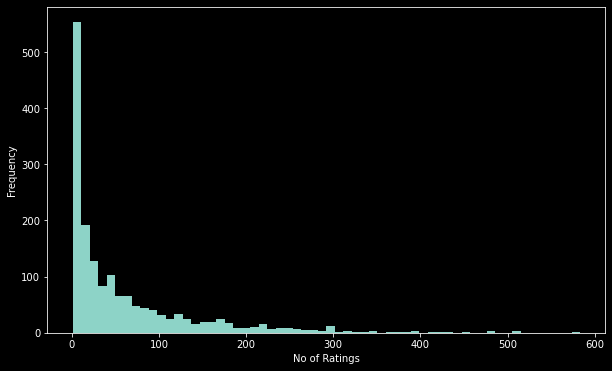

In [52]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no of ratings'],bins = 60)
plt.xlabel('No of Ratings')
plt.ylabel('Frequency')
plt.show()

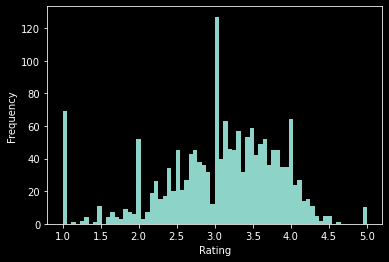

In [51]:
plt.hist(ratings['rating'],bins =70)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

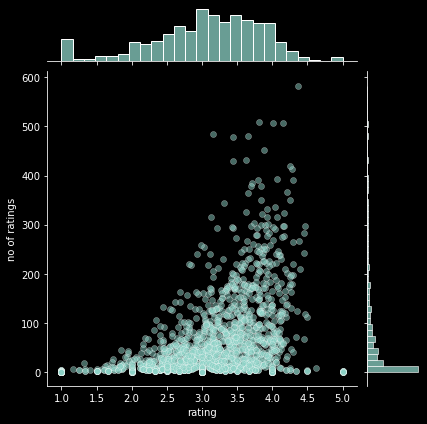

In [53]:
sns.jointplot(x='rating' , y='no of ratings' , data=ratings, alpha=0.5)

# Creating Movie Recommendation

In [54]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [57]:
moviemat = df.pivot_table(index="user_id", columns ="title", values = "rating")

moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [58]:
ratings.sort_values('no of ratings',ascending= False)

,rating,no of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [60]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [61]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [63]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
#how correlated other movies are with star wars

In [64]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
#convert the list into an datarame

In [66]:
corr_starwars.dropna(inplace = True)
#drop all the na values

In [69]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)
#sort the values in descending order and select the top 10 movies

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [73]:
corr_starwars = corr_starwars.join(ratings['no of ratings'])
#join the correlation table and the ratings table
corr_starwars.head()

,Correlation,no of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [75]:
corr_starwars[corr_starwars['no of ratings']>100].sort_values('Correlation', ascending = False)
#sort the table by no of ratings in descending order

,Correlation,no of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Function

In [76]:
def predict_movie(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings['no of ratings'])
    predictions = corr_movie[corr_movie['no of ratings']>100].sort_values('Correlation', ascending = False)
    
    return predictions

In [78]:
predict_movie('101 Dalmatians (1996)').head()

,Correlation,no of ratings
title,,
101 Dalmatians (1996),1.000000,109
Murder at 1600 (1997),0.663965,218
Miracle on 34th Street (1994),0.609938,101
Being There (1979),0.530438,116
"Remains of the Day, The (1993)",0.514223,150
